In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
data = pd.read_csv('Olympics-Data.csv')

In [4]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار اول: ۱۰ کشور برتر
</font>
</h2>



In [5]:
data1 = data.copy()

In [6]:
data1 = data1[data1['Medal'] == 'Gold']

In [7]:
data1_grouped = data1.groupby('Country').agg({'Country': 'count'})

In [247]:
data1_grouped.rename_axis('Country_name', inplace=True)
data1_grouped.sort_values(by='Country', ascending=False,inplace=True)
data1_grouped = data1_grouped[:10]

In [248]:
data1_grouped

,Country
Country_name,
USA,2235
URS,838
GBR,546
ITA,476
GER,452
HUN,412
FRA,408
SWE,349
GDR,329


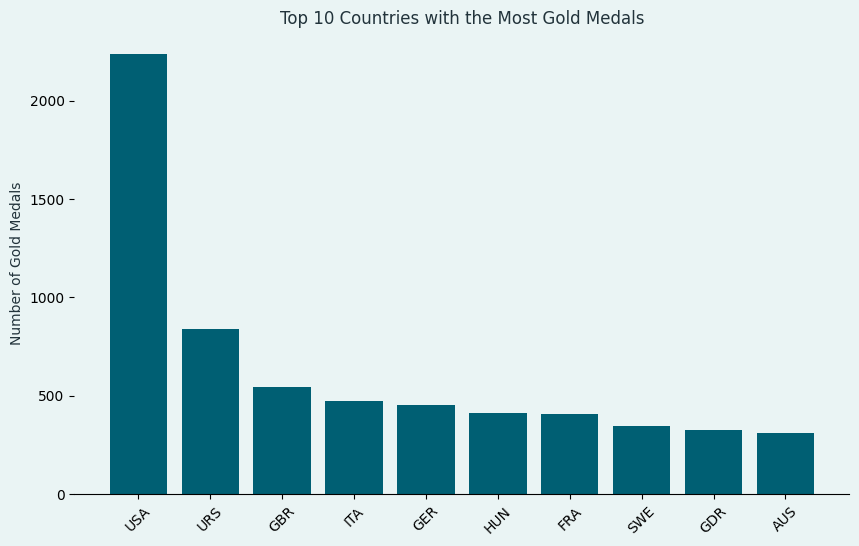

In [249]:
fig_top10 , ax_top10 = plt.subplots(1, 1, figsize=(10, 6))
fig_top10.patch.set_facecolor('#EAF4f4')
ax_top10.set_facecolor('#EAF4f4')
ax_top10.set_title('Top 10 Countries with the Most Gold Medals', fontsize=12)
ax_top10.bar(x=data1_grouped.index, height=data1_grouped['Country'], color='#005f73')
ax_top10.xaxis.label.set_color('#22333b')
ax_top10.yaxis.label.set_color('#22333b')
ax_top10.title.set_color('#22333b')
ax_top10.spines.right.set_visible(False)
ax_top10.spines.top.set_visible(False)
ax_top10.spines.left.set_visible(False)
ax_top10.set_ylabel('Number of Gold Medals', fontsize=10)
ax_top10.tick_params(axis='x', labelrotation= 45)

# plt.ylabel(data1_grouped['Country'], fontsize=10)
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار دوم: تعداد مدال گرفته‌شده در هر سال براساس تفکیک جنسیت
</font>
</h2>


In [25]:
data2 = data.copy()

In [30]:
data2_grouped = pd.crosstab(data['Year'], data['Gender'])

In [65]:
y_man = data2_grouped['Men']
y_women = data2_grouped['Women']

In [32]:
data2_grouped

Gender,Men,Women
Year,,
1896,151,0
1900,501,11
1904,458,12
1908,789,15
1912,855,30
1920,1255,43
1924,833,51
1928,615,95
1932,555,60


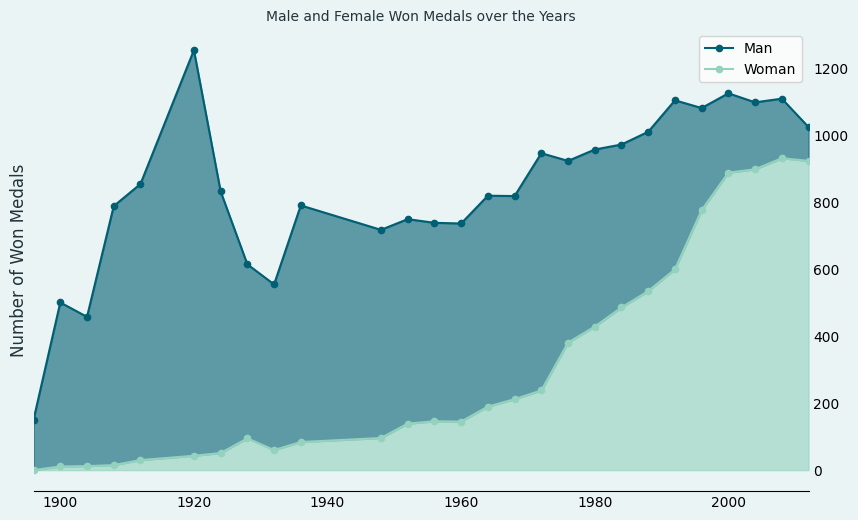

In [251]:
fig_gen , ax_gen =plt.subplots(1, 1, figsize=(10, 6))
fig_gen.patch.set_facecolor('#EAF4f4')
ax_gen.set_facecolor('#EAF4f4')
ax_gen.plot(data2_grouped.index, data2_grouped['Men'],color='#005f73', marker='.', markersize=9)
ax_gen.plot(data2_grouped.index, data2_grouped['Women'], color='#94d2bd', marker='.', markersize=9)
ax_gen.fill_between(data2_grouped.index, y_man, y_women, where= (y_women<=y_man),color='#005f73', alpha=0.6, interpolate=True)
ax_gen.fill_between(data2_grouped.index, y_women, color='#94d2bd', alpha=0.6, interpolate=True)
ax_gen.spines.right.set_visible(False)
ax_gen.spines.top.set_visible(False)
ax_gen.spines.left.set_visible(False)
ax_gen.tick_params(length=0)
ax_gen.set_xlim(1896,2012)
ax_gen.yaxis.tick_right()
ax_gen.title.set_color('#22333b')
ax_gen.yaxis.label.set_color('#22333b')
ax_gen.xaxis.label.set_color('#22333b')
ax_gen.set_ylabel('Number of Won Medals', fontsize=12)
ax_gen.set_title('Male and Female Won Medals over the Years', fontsize=10)
ax_gen.legend(['Man', 'Woman'], loc=1)
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار سوم: آنالیز مدال های دریافتی کشور اسلوواکی
</font>
</h2>

In [114]:
data3 =data.copy()
data3 = data3[data3['Country']=='SVK']

In [160]:
data3_grouped1 = data3.groupby('Sport').agg({'Sport':'count'})

In [167]:
data3_grouped2 = data3.groupby(['Sport', 'Medal']).agg({'Sport':'count'})

In [301]:
data3_grouped2['index_sec'] = [i[1] for i in data3_grouped2.index]


In [302]:
data3_grouped2

Sport index_second index_second1 index_sec
Sport         Medal                                             
Aquatics      Silver      2       Silver           NaN    Silver
Canoe         Bronze      3       Bronze           NaN    Bronze
Canoe / Kayak Bronze      5       Bronze           NaN    Bronze
              Gold       10         Gold           NaN      Gold
              Silver      7       Silver           NaN    Silver
Judo          Silver      1       Silver           NaN    Silver
Shooting      Bronze      3       Bronze           NaN    Bronze
              Silver      2       Silver           NaN    Silver
Wrestling     Bronze      1       Bronze           NaN    Bronze

In [244]:
color = {'Gold': '#E9C46A', 'Silver': '#E0E1DD', 'Bronze': '#CD7F32'}

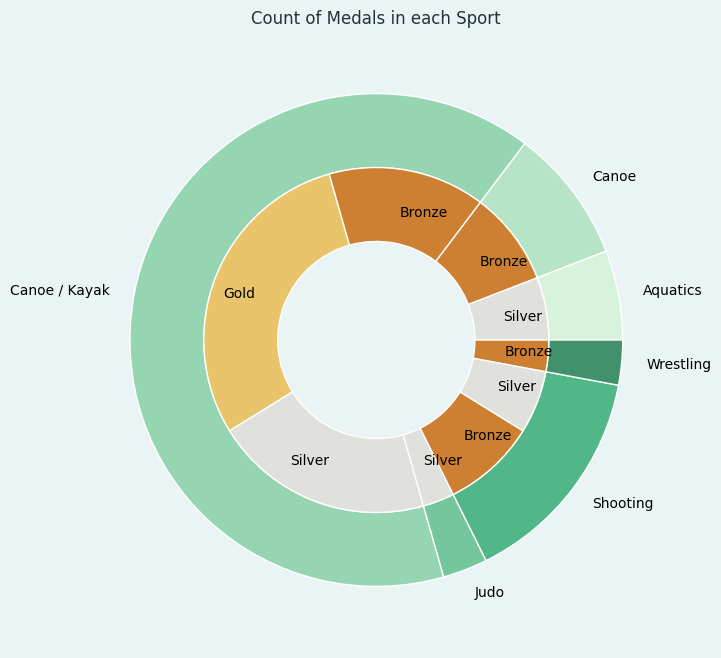

In [303]:
fig_SVK, ax_SVK = plt.subplots(1, 1, figsize=(10, 8))
fig_SVK.patch.set_facecolor('#EAF4f4')
ax_SVK.set_facecolor('#EAF4f4')
plt.pie(data3_grouped1['Sport'], labels=data3_grouped1.index, colors=['#d8f3dc', '#b7e4c7', '#95d5b2','#74c69d','#52b788','#40916c'], radius=1, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.pie(data3_grouped2['Sport'], labels=data3_grouped2['index_sec'], colors=[color[i] for i in data3_grouped2['index_second']], radius=0.7, wedgeprops=dict(width=0.3, edgecolor='w'), labeldistance=0.75)

ax_SVK.set_title('Count of Medals in each Sport', color='#22333b', fontsize=12)
plt.show()